# 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(-1, 1, (100,))
X[:, 1] = 0.75 * X[:, 0] + 1
X += np.random.normal(0, 0.1, X.shape)

In [3]:
def demean(X):
    return X - X.mean(axis=0)
X_demean = demean(X)

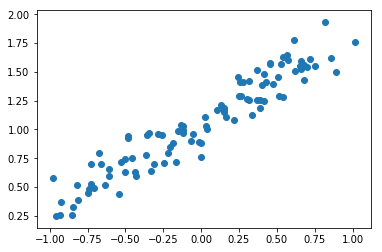

In [4]:
plt.scatter(X_demean[:, 0], X[:, 1])
plt.show()

In [5]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / X.shape[0]
def df(w, X):
    return 2 * X.T.dot(X.dot(w)) / X.shape[0]
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(X, initial_w, eta=0.1, epsilon=1e-8, n_iters_max=1000):
    w = direction(initial_w)
    previous_f = f(w, X)
    n_iters = 0
    while n_iters < n_iters_max:
        gradient = df(w, X)
        w = direction(w + eta * gradient)
        current_f = f(w, X)
        if np.abs(current_f - previous_f) < epsilon:
            break;
        previous_f = current_f
        n_iters += 1
    return w
def first_component(X):
    initial_w = np.random.normal(0, 1, (X.shape[1],))
    return gradient_ascent(X, initial_w)

In [6]:
X_original = X.copy()

w1 = first_component(X)
X1 = X.dot(w1)
X -= X1.reshape(-1, 1) * w1.reshape(1, -1)

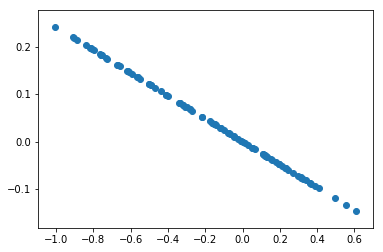

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [8]:
w2 = first_component(X)
X2 = X.dot(w2)
X -= X2.reshape(-1, 1) * w2.reshape(1, -1)

print(np.max(np.abs(X)))

0.000723401789768
